In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

In [15]:
def read_image(path):
    '''
    This function read an image and return a numpy ndarray object.
    The path parameter must be string.
    '''
    if not isinstance(path, str):
        raise TypeError('The path parameter must be a string.')
        
    def actual_read(image_name):
        img = plt.imread(image_name)
        show_image_info(img)
        return img
    return actual_read(path)

In [23]:
def show_image_info(image):
    '''
    This function print all information needed about the image
    and show it in addition
    '''
    if not isinstance(image, np.ndarray):
        raise TypeError('The image parameter must be a numpy array.')
    print(type(image))
    print('#Dimentions:', image.ndim)
    print('Image Shape:', image.shape)
    print('#Pixels:', image.size)
    plt.imshow(image)

In [17]:
    
def pixelate_image(image, window_hight, window_width):
    '''
    This function take an image and pixelate it
    '''
    if not isinstance(image, np.ndarray):
        raise TypeError('The image parameter must be a numpy array.')
    elif image.ndim != 3 :
        raise ValueError('Image dimention is less than expected.')
    
    def start_processing(arr):
        
        for k in range(image.shape[2]):
            for i in range(0,image.shape[0],window_hight):
                for j in range(0,image.shape[1],window_width):

                    if (i + window_hight)>image.shape[0]:
                        window = image[i:image.shape[0],j:(j + window_width),k]
                        image[i:image.shape[0],j:(j + window_width),k] = np.mean(window)

                    elif (j + window_width)>image.shape[1]:
                        window = image[i:(i + window_hight),j:image.shape[1],k]
                        image[i:(i + window_hight),j:image.shape[1],k] = np.mean(window)

                    elif (i + window_hight)>image.shape[0] and (j + window_width)>image.shape[1]:
                        window = image[i:image.shape[0],j:image.shape[1],k]
                        image[i:image.shape[0],j:image.shape[1],k] = np.mean(window)

                    else:
                        window = image[i:(i + window_hight),j:(j + window_width),k]
                        image[i:(i + window_hight),j:(j + window_width),k] = np.mean(window)


        return arr
    
    pixelated_image = image.copy()
    return start_processing(pixelated_image)
    

In [18]:
def save_image(image):
    if not isinstance(image, np.ndarray):
        raise TypeError('The image parameter must be a numpy array.')
    
    plt.imsave('ThePixelatedImage.png',image)
    plt.imshow(image)

Please enter the image path: C:\\Users\\yazee\\Downloads\\test.jpg
<class 'numpy.ndarray'>
#Dimentions: 3
Image Shape: (802, 2400, 3)
#Pixels: 5774400


The original Image


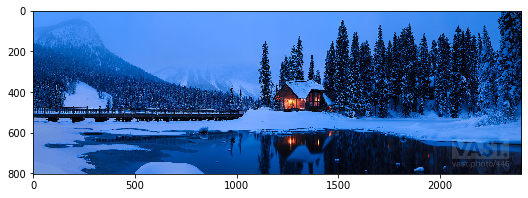

In [29]:
path = input('Please enter the image path: ') # C:\\Users\\yazee\\Downloads\\test.jpg
im = read_image(path)
print('\n\nThe original Image')
plt.imshow(im)

Please Enter Window Height: 25
Please Enter Window Width: 25


Image after Pixelate


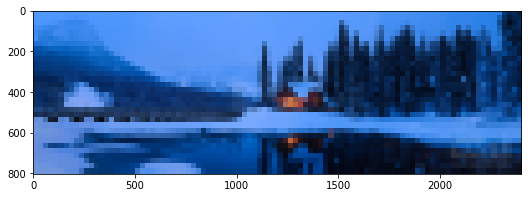

In [33]:
window_hight = int(input('Please Enter Window Height: '))
window_width = int(input('Please Enter Window Width: '))

print('\n\nImage after Pixelate')
image = im.copy()
pixelate_image(image, window_hight, window_width)
save_image(image)